# A pendulum in viscous fluid

In [1]:
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols

In [2]:
t = dynamicsymbols._t

# This would work for now
#
# theta = sp.Function('theta')(t)
# phi = sp.Function('phi')(t)
#
# but later we want sympy to also understand dotted symbols.
# So we go for dynamicsymbols
theta, phi = dynamicsymbols('theta phi')

m, l, g = sp.symbols('m l g', positive=True)

In [3]:
r = l * sp.Matrix(
    [
        sp.sin(theta) * sp.cos(phi),
        sp.sin(theta) * sp.sin(phi),
        sp.cos(theta),
    ]
)
display(r)

Matrix([
[l*sin(theta(t))*cos(phi(t))],
[l*sin(phi(t))*sin(theta(t))],
[            l*cos(theta(t))]])

In [4]:
k = sp.symbols('k', positive=True)

def _mag(vec):
    return sp.sqrt(vec.dot(vec))

F = -k * _mag(r.diff(t)) * r.diff(t)

In [5]:
T = sp.Rational(1, 2) * m * r.diff(t).dot(r.diff(t))
V = m * g * r[2]
L = T - V

In [6]:
q = sp.Matrix([theta, phi])
qd = q.diff(t)

In [7]:
Q = sp.Matrix([r.diff(qi).dot(F) for qi in q])

In [8]:
eoms = sp.Matrix(
    [
        L.diff(qdj).diff(t)
        - L.diff(qj)
        - Qj
        for qj, qdj, Qj in zip(q, qd, Q)
    ]
)
eoms = sp.simplify(eoms)
eoms

Matrix([
[ l*(-g*m*sin(theta(t)) + k*l**2*sqrt(-cos(2*theta(t))*Derivative(phi(t), t)**2/2 + Derivative(phi(t), t)**2/2 + Derivative(theta(t), t)**2)*Derivative(theta(t), t) - l*m*sin(2*theta(t))*Derivative(phi(t), t)**2/2 + l*m*Derivative(theta(t), (t, 2)))],
[l**2*(k*l*sqrt(sin(theta(t))**2*Derivative(phi(t), t)**2 + Derivative(theta(t), t)**2)*sin(theta(t))*Derivative(phi(t), t) + m*sin(theta(t))*Derivative(phi(t), (t, 2)) + 2*m*cos(theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t))*sin(theta(t))]])

In [9]:
eoms_nophi = sp.simplify(eoms.subs({phi.diff(t).diff(t): 0, phi.diff(t): 0}))
eoms_nophi

Matrix([
[l*(-g*m*sin(theta(t)) + k*l**2*sqrt(Derivative(theta(t), t)**2)*Derivative(theta(t), t) + l*m*Derivative(theta(t), (t, 2)))],
[                                                                                                                          0]])

In [10]:
eq_nophi = eoms_nophi[0]
eq_nophi

l*(-g*m*sin(theta(t)) + k*l**2*sqrt(Derivative(theta(t), t)**2)*Derivative(theta(t), t) + l*m*Derivative(theta(t), (t, 2)))

In [11]:
eq_nophi

l*(-g*m*sin(theta(t)) + k*l**2*sqrt(Derivative(theta(t), t)**2)*Derivative(theta(t), t) + l*m*Derivative(theta(t), (t, 2)))

In [12]:
thetadd_solved = sp.solve(eq_nophi, theta.diff(t).diff(t), dict=True)[0][theta.diff(t).diff(t)]
thetadd_solved = sp.simplify(thetadd_solved)
thetadd_solved

g*sin(theta(t))/l - k*l*sqrt(Derivative(theta(t), t)**2)*Derivative(theta(t), t)/m

In [13]:
thetadd_solved_lam = sp.lambdify([t, theta, theta.diff(t), g, k, l, m], thetadd_solved)
thetadd_solved_lam

<function _lambdifygenerated(t, _Dummy_46, _Dummy_45, g, k, l, m)>

In [14]:
from scipy.integrate import solve_ivp
import numpy as np

In [72]:
def rhs(t, y):
    th, thd = y
    res = thetadd_solved_lam(t, th, thd, g=9.81, k=1.0, l=3.0, m=.3)
    return [thd, res]

In [85]:
s = solve_ivp(rhs, (0, 60), [np.deg2rad(0.1), 0])
_t, _y = s.t, s.y

In [86]:
from matplotlib import pyplot as plt

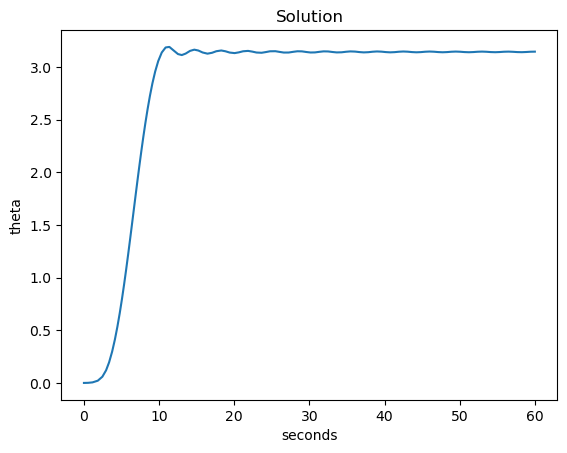

In [87]:
plt.plot(_t, _y[0, :])
plt.ylabel('theta')
plt.xlabel('seconds')
plt.title('Solution');